In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv("C:/Users/mai_a/Downloads/final_data_20.csv")

In [3]:
df.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Rating,Review_Text,Review_Text1,Review_Text2,text_stemmed,text_lemmatized,text_corrected,Without3letters,Emoji_Count,WithoutEmojis,Removed_words,Reviews_words
0,0,0,0,4,ve ever disneyland anywhere ll find disneyland...,ve ever anywhere ll find hong kong similar lay...,ve ever anywhere ll find hong kong similar lay...,ve ever anywher ll find hong kong similar layo...,ve ever anywher ll find hong kong similar layo...,ve ever anywher all find hong kong similar lay...,ever anywher find hong kong similar layout w...,0,,ever anywher find hong kong similar layout wal...,ever anywher find hong kong similar layout wal...


In [6]:
vectorizer = CountVectorizer(stop_words = 'english')
doc_word = vectorizer.fit_transform(df.Reviews_words)
pd.DataFrame(doc_word.toarray(), index=df.Reviews_words, columns=vectorizer.get_feature_names()).head(10)

,aaaaaand,aaahhh,aback,abandon,abbrevi,abdomen,abel,aberdeen,abhor,abit,...,ziplock,zipper,zirconium,zombi,zombieland,zone,zones,zoom,zootopia,zulqairil
Reviews_words,,,,,,,,,,,,,,,,,,,,,
ever anywher find hong kong similar layout walk main street familiar feel small world absolut kabul worth visit fairly busi queue move fairly well,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
since last visit stay tomorrowland marvel land iron experi newly open wasp ironman great feature exit espect whole scenery central area kowloon altman chang previous buzz lightyear less expect someth howe like space mountain turn star great cast member staff felt minu point just feel like brand seem local like ocean even smile face just wanna enter attract leav hello suppos happy place earth brand just really dont feel bakery main street attract delicacy theme sweet good point last also starbuck inside theme,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
thank humid visit otherwise issue shade arriv around leave unfortune last even parade hour much plenty everyone will find someth interest enjoy extreme busi long queue certain attract minut really although amaz felt underwhelm choice attract quit small really expect someth grand even main cast close quit small food option good coffe shop include starbuck plenty gift shop issue toilet everywher toget great really enjoy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
great compact unfortune quit maintain work present number area close include famous cast midweek crowd certainly near notice visit price food drink really roof prepare dollar snack avoid souvenir shop regardless will love,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
local city take around hour kowloon like much everyth fine really crowd hong kong,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
world anaheim tokyo feel hong kong really small call attract souvenir food even entrance ticket slightly expense well basic good small child peopl never food choice accept mostly fast food expense bottle water howe expense water fountain around refill water bottle parade pretty good crowd problem problem peopl just rude push shove line gift shop food stand just much take forget show free seat happen manage property,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
great place will even know obvious daughter absolut love parade cancel though,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
think intro magic littl almost attract complet drawback time example storybook theater close privat event restaur close week tour well best plan visit week disappoint food even maxim decent restaur main street corner cafe main street bakery prepare topic abrupt hongkong style service serv staff,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
feel place train fantasy past station signal terrible staff just want rain work find place price character cabana photo visitor rain dont wast money walt horrific enough place amount peopl rest room seem build someth know atmosphere fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
nmf_model = NMF(5)
doc_topic = nmf_model.fit_transform(doc_word)

C:\Users\mai_a\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [13]:
topic_word = pd.DataFrame(nmf_model.components_.round(3),
             index = ["t1","t2","t3","t4", "t5"],
             columns = vectorizer.get_feature_names())
topic_word

,aaaaaand,aaahhh,aback,abandon,abbrevi,abdomen,abel,aberdeen,abhor,abit,...,ziplock,zipper,zirconium,zombi,zombieland,zone,zones,zoom,zootopia,zulqairil
t1,0.000,0.000,0.000,0.005,0.002,0.000,0.000,0.000,0.001,0.004,...,0.000,0.000,0.0,0.009,0.000,0.044,0.001,0.000,0.003,0.0
t2,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.009,0.007,0.0,0.003,0.000,0.000,0.000,0.000,0.000,0.0
t3,0.000,0.000,0.000,0.002,0.000,0.003,0.000,0.000,0.002,0.000,...,0.002,0.000,0.0,0.006,0.000,0.030,0.000,0.015,0.000,0.0
t4,0.002,0.000,0.002,0.008,0.004,0.000,0.001,0.000,0.000,0.005,...,0.000,0.000,0.0,0.000,0.000,0.014,0.000,0.000,0.000,0.0
t5,0.000,0.001,0.000,0.000,0.000,0.000,0.001,0.001,0.000,0.006,...,0.000,0.000,0.0,0.000,0.001,0.040,0.005,0.003,0.000,0.0


In [14]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [15]:
display_topics(nmf_model, vectorizer.get_feature_names(), 10)


Topic  0
just, parade, place, great, love, make, good, really, like, firework

Topic  1
line, wait, long, fast, peopl, hour, minut, ticket, crowd, time

Topic  2
ride, mountain, space, fast, like, world, fatass, wait, star, small

Topic  3
visit, attract, place, enjoy, year, park, crowd, experi, world, magic

Topic  4
hong, kong, small, queue, food, good, attract, train, ticket, land


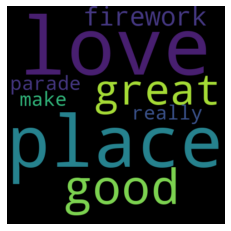

In [107]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text=("just parade place place place place great great great love love love love love make good good good good really like like like like firework firework")

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

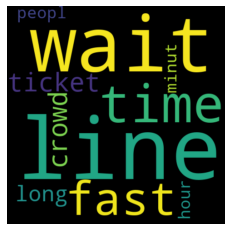

In [108]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text=("line line line line line wait wait wait wait long long fast fast fast peopl hour minut ticket ticket ticket crowd crowd crowd time time time time")

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text=("Python Python Python Matplotlib")

# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [106]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = nmf_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

AttributeError: 'NMF' object has no attribute 'show_topics'

In [104]:
!pip install wordcloud

In [17]:
H = pd.DataFrame(doc_topic.round(5),
             index = df.Reviews_words,
             columns = ["t1","t2", "t3","t4", "t5" ])


,t1,t2,t3,t4,t5
Reviews_words,,,,,
ever anywher find hong kong similar layout walk main street familiar feel small world absolut kabul worth visit fairly busi queue move fairly well,0.00000,0.00000,0.00424,0.08184,0.15949
since last visit stay tomorrowland marvel land iron experi newly open wasp ironman great feature exit espect whole scenery central area kowloon altman chang previous buzz lightyear less expect someth howe like space mountain turn star great cast member staff felt minu point just feel like brand seem local like ocean even smile face just wanna enter attract leav hello suppos happy place earth brand just really dont feel bakery main street attract delicacy theme sweet good point last also starbuck inside theme,0.19132,0.00000,0.05590,0.09010,0.04078
thank humid visit otherwise issue shade arriv around leave unfortune last even parade hour much plenty everyone will find someth interest enjoy extreme busi long queue certain attract minut really although amaz felt underwhelm choice attract quit small really expect someth grand even main cast close quit small food option good coffe shop include starbuck plenty gift shop issue toilet everywher toget great really enjoy,0.12366,0.00696,0.01044,0.09735,0.12997
great compact unfortune quit maintain work present number area close include famous cast midweek crowd certainly near notice visit price food drink really roof prepare dollar snack avoid souvenir shop regardless will love,0.06930,0.00281,0.00000,0.07827,0.00672
local city take around hour kowloon like much everyth fine really crowd hong kong,0.00919,0.01505,0.00000,0.00000,0.10901
...,...,...,...,...,...
love second year annual love stay usual saturday night spend hour love firework show cours,0.06869,0.00000,0.00000,0.00031,0.00000
noth describe word just amaz inde happy place access miss attract miss busi small world least time full round ride tram night space mountain small best refresh roller coaster ride will find favorit firework parade,0.05468,0.00000,0.17413,0.01213,0.04846
everyth great short line peopl splash mountain close bummer,0.00941,0.05932,0.01950,0.00000,0.00000


In [18]:
H.head()

,t1,t2,t3,t4,t5
Reviews_words,,,,,
ever anywher find hong kong similar layout walk main street familiar feel small world absolut kabul worth visit fairly busi queue move fairly well,0.00000,0.00000,0.00424,0.08184,0.15949
since last visit stay tomorrowland marvel land iron experi newly open wasp ironman great feature exit espect whole scenery central area kowloon altman chang previous buzz lightyear less expect someth howe like space mountain turn star great cast member staff felt minu point just feel like brand seem local like ocean even smile face just wanna enter attract leav hello suppos happy place earth brand just really dont feel bakery main street attract delicacy theme sweet good point last also starbuck inside theme,0.19132,0.00000,0.05590,0.09010,0.04078
thank humid visit otherwise issue shade arriv around leave unfortune last even parade hour much plenty everyone will find someth interest enjoy extreme busi long queue certain attract minut really although amaz felt underwhelm choice attract quit small really expect someth grand even main cast close quit small food option good coffe shop include starbuck plenty gift shop issue toilet everywher toget great really enjoy,0.12366,0.00696,0.01044,0.09735,0.12997
great compact unfortune quit maintain work present number area close include famous cast midweek crowd certainly near notice visit price food drink really roof prepare dollar snack avoid souvenir shop regardless will love,0.06930,0.00281,0.00000,0.07827,0.00672
local city take around hour kowloon like much everyth fine really crowd hong kong,0.00919,0.01505,0.00000,0.00000,0.10901


In [55]:
X = H[["t1","t2","t3","t4","t5"]]
y = df["Rating"]
X

,t1,t2,t3,t4,t5
Reviews_words,,,,,
ever anywher find hong kong similar layout walk main street familiar feel small world absolut kabul worth visit fairly busi queue move fairly well,0.00000,0.00000,0.00424,0.08184,0.15949
since last visit stay tomorrowland marvel land iron experi newly open wasp ironman great feature exit espect whole scenery central area kowloon altman chang previous buzz lightyear less expect someth howe like space mountain turn star great cast member staff felt minu point just feel like brand seem local like ocean even smile face just wanna enter attract leav hello suppos happy place earth brand just really dont feel bakery main street attract delicacy theme sweet good point last also starbuck inside theme,0.19132,0.00000,0.05590,0.09010,0.04078
thank humid visit otherwise issue shade arriv around leave unfortune last even parade hour much plenty everyone will find someth interest enjoy extreme busi long queue certain attract minut really although amaz felt underwhelm choice attract quit small really expect someth grand even main cast close quit small food option good coffe shop include starbuck plenty gift shop issue toilet everywher toget great really enjoy,0.12366,0.00696,0.01044,0.09735,0.12997
great compact unfortune quit maintain work present number area close include famous cast midweek crowd certainly near notice visit price food drink really roof prepare dollar snack avoid souvenir shop regardless will love,0.06930,0.00281,0.00000,0.07827,0.00672
local city take around hour kowloon like much everyth fine really crowd hong kong,0.00919,0.01505,0.00000,0.00000,0.10901
...,...,...,...,...,...
love second year annual love stay usual saturday night spend hour love firework show cours,0.06869,0.00000,0.00000,0.00031,0.00000
noth describe word just amaz inde happy place access miss attract miss busi small world least time full round ride tram night space mountain small best refresh roller coaster ride will find favorit firework parade,0.05468,0.00000,0.17413,0.01213,0.04846
everyth great short line peopl splash mountain close bummer,0.00941,0.05932,0.01950,0.00000,0.00000


In [75]:
import numpy as np
# 1 for popular and 0 for not popular
df['Rating_binary']=np.where(df['Rating']>= 4, 1, 0)

In [57]:
df.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Rating,Review_Text,Review_Text1,Review_Text2,text_stemmed,text_lemmatized,text_corrected,Without3letters,Emoji_Count,WithoutEmojis,Removed_words,Reviews_words,Rating_binary
0,0,0,0,4,ve ever disneyland anywhere ll find disneyland...,ve ever anywhere ll find hong kong similar lay...,ve ever anywhere ll find hong kong similar lay...,ve ever anywher ll find hong kong similar layo...,ve ever anywher ll find hong kong similar layo...,ve ever anywher all find hong kong similar lay...,ever anywher find hong kong similar layout w...,0,,ever anywher find hong kong similar layout wal...,ever anywher find hong kong similar layout wal...,1


In [58]:
y

0        4
1        4
2        4
3        4
4        4
        ..
19995    5
19996    5
19997    5
19998    5
19999    4
Name: Rating, Length: 20000, dtype: int64

In [76]:
y = df['Rating_binary']

In [77]:
y.value_counts()

1    16448
0     3552
Name: Rating_binary, dtype: int64

In [94]:
from sklearn.metrics import f1_score, roc_auc_score
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {0 : n_neg * 4, 1 : n_pos}

In [96]:
smote = imblearn.over_sampling.SMOTE(sampling_strategy=ratio, random_state = 42)
X_tr_smote, y_tr_smote = smote.fit_resample(X_train1, y_train1)
lr_smote = LogisticRegression(solver='liblinear')
lr_smote.fit(X_tr_smote, y_tr_smote)
print('Logistic Regression on SMOTE Train Data; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_val, lr_smote.predict(X_val)), roc_auc_score(y_val, lr_smote.predict_proba(X_val)[:,1])))

SyntaxError: invalid character in identifier (<ipython-input-96-55e941764e26>, line 6)

In [78]:
X.shape, y.shape

((20000, 5), (20000,))

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [81]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=0)

In [82]:
X_train.shape

(16000, 5)

In [83]:
clf = LinearSVC(C=10, class_weight="balanced")
clf.fit(X_train, y_train)

C:\Users\mai_a\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=10, class_weight='balanced')

In [84]:
clf.score(X_val,y_val)

0.6709375

In [85]:
clf.score(X_test,y_test)

0.67725

### Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 1) 
lr.fit(X_train1, y_train1)

LogisticRegression(C=1)

In [102]:
lr.score(X_train1, y_train1)

0.819609375

In [87]:
lr.score(X_val,y_val)

0.8253125

In [88]:
lr.score(X_test,y_test)

0.8325

### Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [101]:
rf_clf = RandomForestClassifier(n_estimators = 100,max_features=5, max_depth=7,min_samples_leaf=2, random_state = 0)
rf_clf.fit(X_train1, y_train1)
print('Accuracy on train set:',rf_clf.score(X_train1, y_train1))
print('Accuracy on validation set:',rf_clf.score(X_val,y_val))
print('Accuracy on test set:',rf_clf.score(X_test,y_test))

Accuracy on train set: 0.827578125
Accuracy on validation set: 0.824375
Accuracy on test set: 0.83225


## KNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train1, y_train1)
print('Accuracy on validation set:',knn.score(X_val,y_val))
print('Accuracy on test set:',knn.score(X_test, y_test))

Accuracy on validation set: 0.806875
Accuracy on test set: 0.813


## Naive Bayes

In [97]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train1, y_train1)

MultinomialNB()

In [100]:
mnb.score(X_train1, y_train1)

0.8190625

In [98]:
mnb.score(X_val,y_val)

0.824375

In [99]:
mnb.score(X_test,y_test)

0.8315

In [109]:
import pickle
with open(f"C:/Users/mai_a/Desktop/Project4_NLP/lr_model.pickle", "wb") as pfile:
    pickle.dump(lr, pfile)